In [1]:
import pandas as pd

target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(target_url, header=0, sep=";")
# fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | 
# total sulfur dioxide | density  |  pH | sulphates | alcohol  quality
df.columns = ['非挥发性酸','挥发性酸','柠檬酸', '残留糖分', '氯化物', '游离二氧化硫','总二氧化硫', '密度', 
              'PH值', '亚硝酸盐', '酒精含量', '品质']

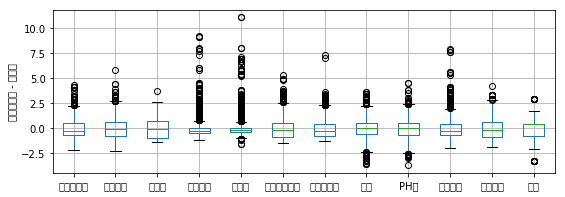

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3))

((df - df.mean()) / df.std()).boxplot()
plt.ylabel("四分位间距 - 标准化")
plt.show()

### 平行坐标图

第一张图仅仅对标签值进行标准化，但对数据范围较小的变量压缩的看不清，于是有第二张图。

第二张图对所有变量都进行了标准化，效果大为改善。

可视化结果发现，深蓝线（高品质）聚集在酒精含量高值区；而深红线（低品质）聚集在挥发性酸的高值区。这些都是最明显的相关属性。

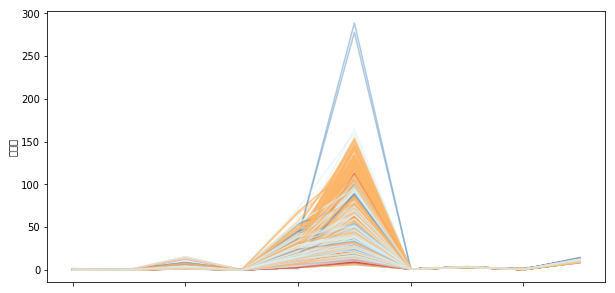

In [5]:
import numpy as np
_lim = (df.shape[1]-1)
xs = df.iloc[:,11]*1.0
_xs = (xs-xs.mean())/xs.std()
_xs = 1.0/(1.0+np.exp(-_xs))
plt.figure(figsize=(10, 5))
for i in range(df.shape[0]):    
    df.iloc[i,1:_lim].plot(color=plt.cm.RdYlBu(_xs[i]),alpha=0.5)
plt.ylabel("属性值")
plt.show()

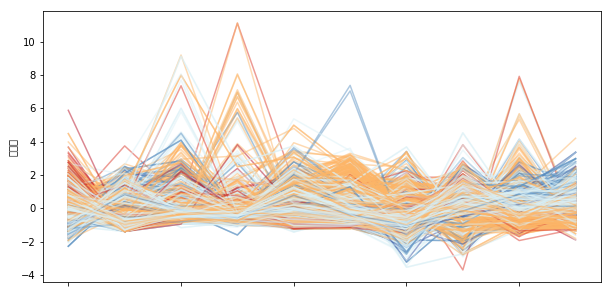

In [8]:
_df = (df-df.mean())/df.std()
xs = _df.iloc[:,11]*1.0
_xs = 1.0/(1.0+np.exp(-xs))
plt.figure(figsize=(10, 5))
for i in range(df.shape[0]):    
    _df.iloc[i,1:_lim].plot(color=plt.cm.RdYlBu(_xs[i]),alpha=0.5)
plt.ylabel("属性值")
plt.show()

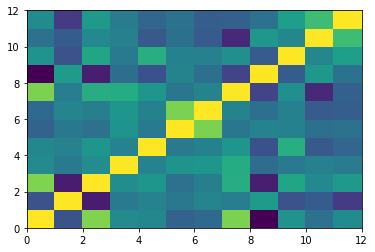

In [9]:
plt.pcolor(df.corr())
plt.show()